### Outline
------------------------

* Introdução

* Metodologia
   * Descrição dos procedimentos
--------------------------------------------------------

* Aplicação
  * Análise Descritiva e Limpeza
  * Treinamento dos modelos 
    * Redução de dimensionalidade
        * PCA 
        * UMAP
    * Clusterização
        * KNN 
        * DBSCAN
    * Classificação 
        * glmnet
        * Random Forest
------------------------------------------------------------------------
* Resultados e conclusões


# Introdução


Uma grande multinacional varejista do ramo de supermercados deseja ingressar no mercado brasileiro. Você é o responsável pela análise que servirá de base para a estratégia (tomada de decisão) de entrada dessa empresa no Brasil. 
Elabore uma apresentação para os investidores desta empresa buscando realizar as seguintes tarefas:

  *  **Realize uma classificação dos municípios brasileiros com base nas informações disponíveis e faça uma caracterização dos municípios em grupos.**
 
 *  **Elabore uma forma de classificar um novo município entre os grupos já criados na etapa anterior**
 
 * **Responda em sua apresentação quais grupos de municípios deveriam ser a porta de entrada para empresa no país e porque.**

# 1 - Aplicação

## 1.1 - Análise descritiva e limpeza dos dados

In [6]:
import os
import pandas as pd
import numpy as np
import sklearn as sk
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib
import shap
import umap
import scipy
from sklearn.decomposition import PCA
from umap import UMAP
import matplotlib.pyplot as plt
os.getcwd()

'/projects'

In [8]:
## leitura do dataset
diretorio = "/projects/data/raw/dados_municipais.csv"
dados_municipais = pd.read_csv(diretorio, sep = ",")

In [57]:
## estatisticas descritivas do dataset
print(dados_municipais.shape)
dados_municipais.describe().transpose()

(5360, 26)


,count,mean,std,min,25%,50%,75%,max
Código,5360.0,323877.352425,98050.905443,110001.000,251057.500000,314305.000000,411573.500000,5.300100e+05
Área_km_,5360.0,1562.394907,5794.068765,2.900,206.475000,419.700000,1042.925000,1.614459e+05
Densidade_demográfica_2000,5360.0,95.634907,526.603116,0.100,11.300000,23.600000,47.625000,1.288140e+04
Distância_à_capital_km_,5360.0,253.265511,163.387592,0.000,121.814246,228.019533,357.817869,1.474315e+03
Esperança_de_vida_ao_nascer_2000,5360.0,67.732116,4.854705,54.350,64.510000,68.230000,71.410000,7.818000e+01
Mortalidade_até_um_ano_de_idade_2000,5360.0,34.126541,18.460107,5.380,18.730000,29.510000,46.220000,1.096700e+02
Taxa_de_fecundidade_total_2000,5360.0,2.867433,0.746162,1.560,2.330000,2.670000,3.230000,7.790000e+00
Percentual_de_pessoas_de_25_anos_ou_mais_analfabetas_2000,5360.0,26.721034,15.150629,2.020,14.030000,22.675000,39.852500,7.026000e+01
Renda_per_Capita_2000,5360.0,170.331888,95.950230,28.380,86.370000,158.545000,232.175000,9.546500e+02
Índice_de_Gini_2000,5360.0,0.561086,0.058758,0.360,0.520000,0.560000,0.600000,8.200000e-01


In [205]:
1+3.3*np.log(dados_municipais.shape[1])

11.75171857547089

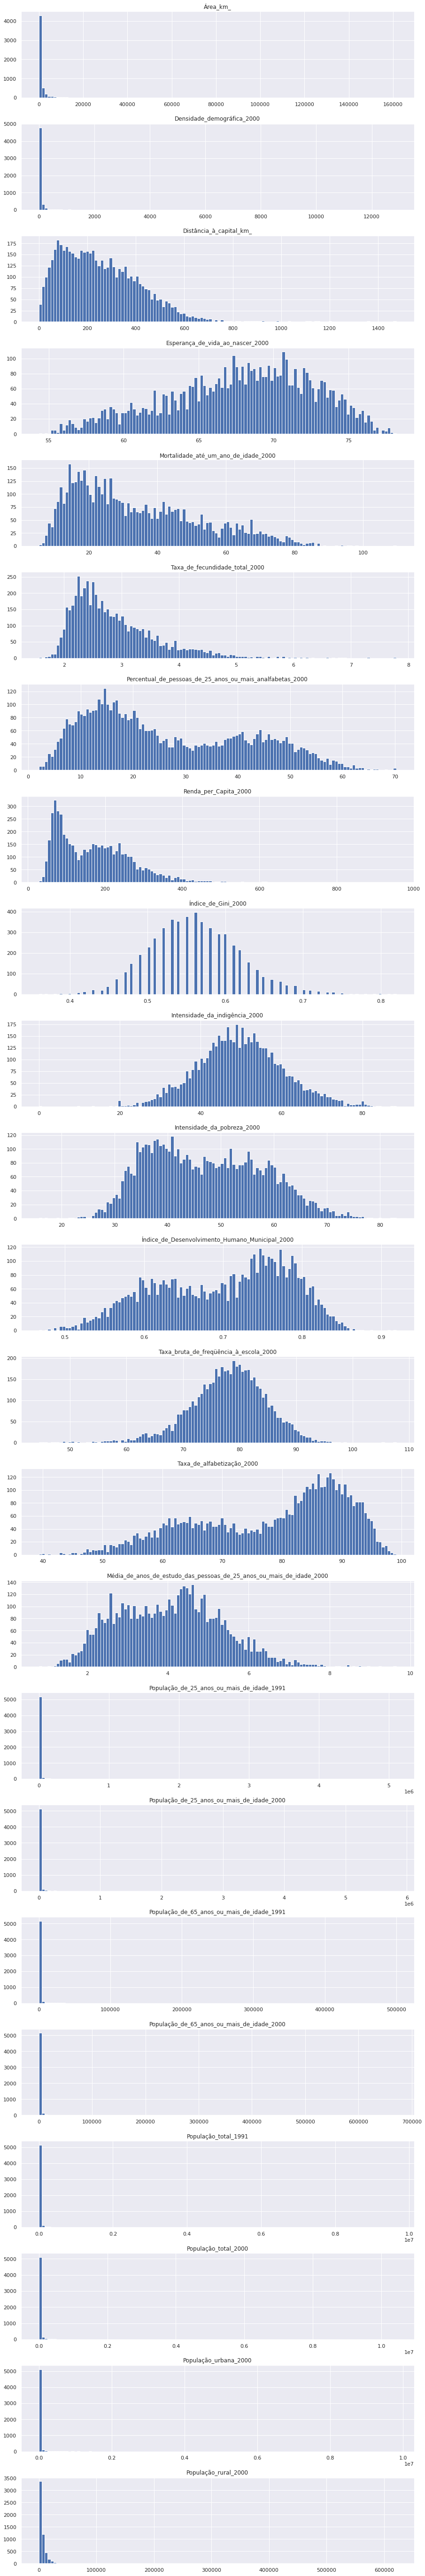

In [303]:
import seaborn as sns
import matplotlib.pyplot as plt
# set a grey background (use sns.set_theme() if seaborn version 0.11.0 or above) 
sns.set(style="darkgrid")
#fig, axs = plt.subplots(1, 2, figsize=(10, 10))
#sns.histplot(data = dados_municipais, x = "Área_km_", color = "skyblue")

fig, axes = plt.subplots(23, figsize = (15,100))
for i, j in zip(dados_municipais.columns[3:26], range(0, 23)):
    dados_municipais.hist("{0}".format(i), bins = 122 , ax=axes[j])

In [93]:
axes[4,4]

<AxesSubplot:>

In [191]:
columns = [ 
	   'Densidade_demográfica_2000', 'Distância_à_capital_km_',
       'Esperança_de_vida_ao_nascer_2000',
       'Mortalidade_até_um_ano_de_idade_2000',
       'Taxa_de_fecundidade_total_2000',
       'Percentual_de_pessoas_de_25_anos_ou_mais_analfabetas_2000',
       'Renda_per_Capita_2000', 'Índice_de_Gini_2000',
       'Intensidade_da_indigência_2000', 'Intensidade_da_pobreza_2000',
       'Índice_de_Desenvolvimento_Humano_Municipal_2000',
       'Taxa_bruta_de_freqüência_à_escola_2000', 'Taxa_de_alfabetização_2000',
       'Média_de_anos_de_estudo_das_pessoas_de_25_anos_ou_mais_de_idade_2000',
       'População_de_25_anos_ou_mais_de_idade_1991',
       'População_de_25_anos_ou_mais_de_idade_2000',
       'População_de_65_anos_ou_mais_de_idade_1991',
       'População_de_65_anos_ou_mais_de_idade_2000', 'População_total_1991',
       'População_total_2000', 'População_urbana_2000',
       'População_rural_2000'
    ]

dados_municipais_numericFeatures = dados_municipais[columns].values

dados_municipais_numericFeatures.shape

(5360, 22)

In [223]:
mimaxscaler = sk.preprocessing.MinMaxScaler()

In [240]:
dd = pd.DataFrame(dados_municipais['Taxa_de_alfabetização_2000'])
scale = sk.preprocessing.MinMaxScaler()
dd = scale.fit_transform(dd)

In [295]:
#pd.DataFrame(dd).hist(bins=42)
dbscan = sk.cluster.DBSCAN()
dbscanmodel = dbscan.fit(dd)
ddc = dbscanmodel.fit_predict(dd)
ddc = pd.DataFrame({"cn":ddc})
ddc.min()

cn    0
dtype: int64

In [302]:
knn = sk.cluster.KMeans(n_clusters = 3)
knn = knn.fit(dd)
knn.predict(dd)

array([0, 0, 0, ..., 2, 0, 2], dtype=int32)


### PCA

In [85]:
scale_transformer = sk.preprocessing.StandardScaler()
dados_scaled = scale_transformer.fit_transform(dados_municipais_numericFeatures)

In [ ]:
pca_model = sk.decomposition.PCA(n_components = 'mle')

pca_decomposed_data = pca_model.fit_transform(dados_scaled)
pca_decomposed_data.shape
#plot_PCA = plt.scatter(pca_decomposed_data[:,0], pca_decomposed_data[:,1])
#plot_PCA = plt.scatter(pca_decomposed_data[:,0], pca_decomposed_data[:,2])
#plot_PCA = plt.scatter(pca_decomposed_data[:,1], pca_decomposed_data[:,8])
#plot_PCA = plt.scatter(pca_decomposed_data[:,2], pca_decomposed_data[:,3])
#plot_PCA = plt.scatter(pca_decomposed_data[:,5], pca_decomposed_data[:,6])
#plot_PCA = plt.scatter(pca_decomposed_data[:,0], pca_decomposed_data[:,9])
fig, axs = plt.subplots(18)
axs[i] = plt.scatter(pca_decomposed_data[:,i], pca_decomposed_data[:,i+1])

In [60]:
pca_model_fit.explained_variance_

array([1.17542002e+11, 2.03176458e+08, 9.58277792e+07, 1.34690993e+07,
       1.97462876e+06, 6.79914191e+05, 1.96389678e+05, 2.58934204e+04,
       1.54435643e+04, 7.45736207e+03])

In [ ]:
dbscan_cluster = sk.cluster.DBSCAN()
cluster = dbscan_cluster.fit_predict(pca_decomposed_data)
dd = pd.DataFrame({"cname" : cluster})

    
dd.aggregate(count(cname))

In [79]:
pca_decomposed_data

array([[-4.41073620e+04, -5.21597641e+02,  3.84374843e+03, ...,
        -2.30157724e+02,  7.73251265e+01,  2.98841681e+01],
       [-4.09054945e+04,  8.93973945e+02,  3.53027452e+03, ...,
         1.16231375e+02, -5.38590210e+01,  2.39284012e+01],
       [-3.40074150e+04,  4.16921144e+02,  1.51590504e+03, ...,
        -1.73478124e+02,  4.39886836e+01, -8.31048963e+00],
       ...,
       [ 7.19654903e+04,  3.93945367e+03, -1.84745508e+04, ...,
        -1.34290007e+02,  1.21612395e+02,  2.12569399e+01],
       [ 6.59840963e+04,  5.02750814e+03, -1.47109635e+02, ...,
        -1.56770490e+02,  2.25918203e+01,  9.74478443e+01],
       [-1.95051220e+04,  1.01557440e+03, -2.07286211e+02, ...,
        -5.36581036e+01,  6.34280331e+01, -4.02040150e+01]])

In [142]:
dbscan_cluster = sk.cluster.DBSCAN()
dbscan_clusters = dbscan_cluster.fit_predict(dados_scaled)

In [159]:
dbscan_clusters.sum()



-5360